# Question 1

## 2-dimensional Gaussian

2-dimensional normal distribution with parameters $\mu_1 = 1$, $\sigma_1 = 3$, $\mu_2 = 4$, $\sigma_2 = 2$, $\rho = 0.5$. Make plots of the conditional and marginal distributions.

(1000, 1000)
[[0.02407609 0.02409392 0.0241117  ... 0.01548749 0.0154623  0.01543711]
 [0.02408143 0.02409928 0.02411709 ... 0.01550468 0.01547948 0.01545428]
 [0.02408673 0.02410462 0.02412245 ... 0.01552188 0.01549666 0.01547145]
 ...
 [0.01547145 0.01549666 0.01552188 ... 0.02412245 0.02410462 0.02408673]
 [0.01545428 0.01547948 0.01550468 ... 0.02411709 0.02409928 0.02408143]
 [0.01543711 0.0154623  0.01548749 ... 0.0241117  0.02409392 0.02407609]]


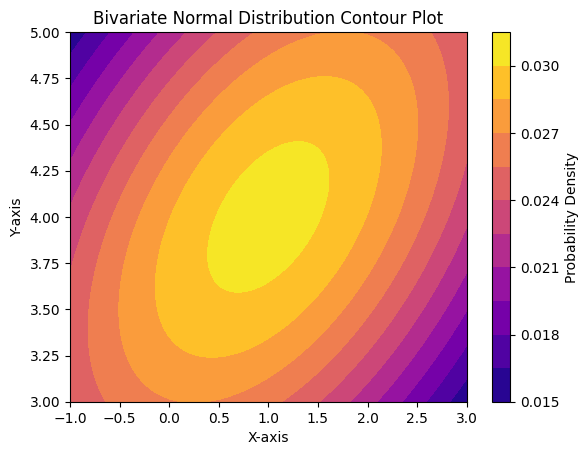

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import seaborn as sns

# Define parameters of the MVN
mu_1 = 1
mu_2 = 4
sigma_1 = 3
sigma_2 = 2
corr_12 = 0.5

# x values
xx, yy = np.meshgrid(np.linspace(-1, 3, 1000), np.linspace(3, 5, 1000))
print(xx.shape)
pos = np.dstack((xx, yy))

mvn = multivariate_normal(mean = [mu_1, mu_2], cov=[[sigma_1 ** 2, corr_12 * sigma_1 * sigma_2],[corr_12 * sigma_1 * sigma_2, sigma_2 ** 2]])
print(mvn.pdf(pos))
plt.contourf(xx, yy, mvn.pdf(pos), levels=10, cmap='plasma')
plt.colorbar(label='Probability Density')
plt.title('Bivariate Normal Distribution Contour Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## Conditional and marginal PDFs

Conditional PDF of a multivariate normal is given by

\begin{equation}
    P(x_1|x_2) \sim(\mu_{1|2},\Sigma_{1|2}),
\end{equation}

where

\begin{equation}
    \mu_{1|2} = \mu_1 + \Sigma_{12}\Sigma_{22}^{-1}(x_2 - \mu_2),
\end{equation}

\begin{equation}
    \Sigma_{1|2} = \Sigma_{11} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}.
\end{equation}

Marginal PDF of X1 at mu_1: [0.05467002 0.05469433 0.05471863 ... 0.018021   0.01800899 0.01799699]
Marginal PDF of X2 at mu_2: [0.00043634 0.00043711 0.00043787 ... 0.06485599 0.06480738 0.0647588 ]


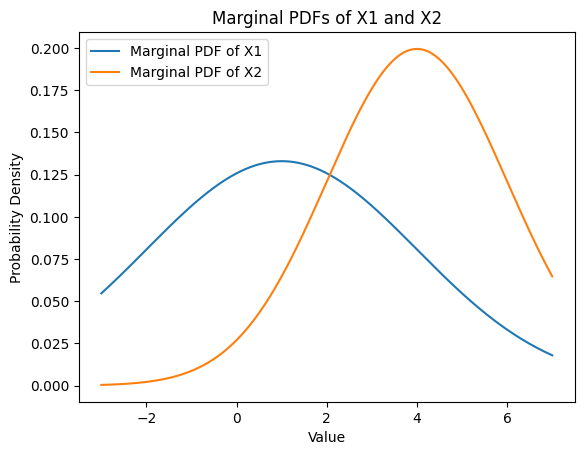

Conditional PDF of X2 given X1=1.5: [0.18358151 0.18372437 0.1838671  0.18400969 0.18415214 0.18429446
 0.18443665 0.1845787  0.18472061 0.18486238 0.18500401 0.18514551
 0.18528686 0.18542808 0.18556915 0.18571009 0.18585088 0.18599153
 0.18613204 0.18627241 0.18641263 0.18655271 0.18669265 0.18683244
 0.18697209 0.18711159 0.18725094 0.18739015 0.18752921 0.18766812
 0.18780689 0.1879455  0.18808397 0.18822229 0.18836046 0.18849848
 0.18863634 0.18877406 0.18891162 0.18904903 0.18918629 0.1893234
 0.18946035 0.18959715 0.18973379 0.18987028 0.19000661 0.19014278
 0.1902788  0.19041466 0.19055037 0.19068591 0.1908213  0.19095653
 0.1910916  0.19122651 0.19136126 0.19149585 0.19163027 0.19176454
 0.19189864 0.19203258 0.19216636 0.19229997 0.19243342 0.1925667
 0.19269982 0.19283278 0.19296556 0.19309818 0.19323064 0.19336292
 0.19349504 0.19362699 0.19375877 0.19389038 0.19402182 0.1941531
 0.1942842  0.19441513 0.19454588 0.19467647 0.19480688 0.19493712
 0.19506719 0.19519708 0.1953

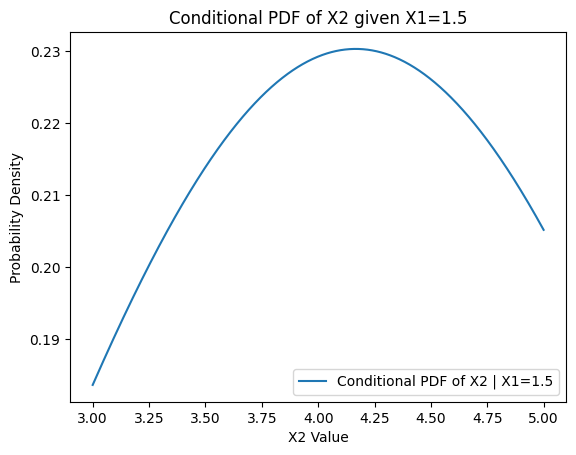

In [16]:
x1 = norm(loc=mu_1, scale=sigma_1)
x2 = norm(loc=mu_2, scale=sigma_2)
x1_vals = np.linspace(-3, 7, 10000)
x2_vals = np.linspace(-3, 7, 10000)
print(f"Marginal PDF of X1 at mu_1: {x1.pdf(x1_vals)}")
print(f"Marginal PDF of X2 at mu_2: {x2.pdf(x2_vals)}")

plt.plot(x1_vals, x1.pdf(x1_vals), label='Marginal PDF of X1')
plt.plot(x2_vals, x2.pdf(x2_vals), label='Marginal PDF of X2')
plt.title('Marginal PDFs of X1 and X2')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Conditional PDF of X2 given X1 = x1_0
x1_0 = 1.5
cond_mu_2 = mu_2 + corr_12 * (sigma_2 / sigma_1) * (x1_0 - mu_1)
cond_sigma_2 = sigma_2 * np.sqrt(1 - corr_12 ** 2)
cond_x2 = norm(loc=cond_mu_2, scale=cond_sigma_2)
x2_cond_vals = np.linspace(3, 5, 1000)
print(f"Conditional PDF of X2 given X1={x1_0}: {cond_x2.pdf(x2_cond_vals)}")
plt.plot(x2_cond_vals, cond_x2.pdf(x2_cond_vals), label=f'Conditional PDF of X2 | X1={x1_0}')
plt.title(f'Conditional PDF of X2 given X1={x1_0}')
plt.xlabel('X2 Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()